In [3]:
import sys
sys.path.append('..')

import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# from src.analysis import plot_categoric_attribute, plot_discrete_attribute
# from src.helpers import get_numeric_columns

In [4]:
%run 1st_Functions.ipynb

In [5]:
# Connect to DB
conn, cursor= connect()

import pandas
# sql = """ SELECT * from players where field_position in ('GK') """
sql = f"SELECT * from players"

data = pandas.read_sql(sql, con=conn)
# conn.commit()

# Disconnect from DB
disconnect(conn, cursor)

# data = create_players_dataframes(data, columns_to_keep)
# display(data)
display(data.shape)
# goal_keepers_data = create_fifa_players_dataset(goal_keepers_data, './resources/', 'goal_keepers.csv')

<connection object at 0x000001F6E15FE8C0; dsn: 'user=postgres password=xxx dbname=fifa-players-prediction host=fifa-players-prediction.cbbrjkjz8akw.us-east-2.rds.amazonaws.com port=5432', closed: 0>
Connected!


(18159, 88)

## Data structure
|columns|rows|
|--|--|
|88|18159|

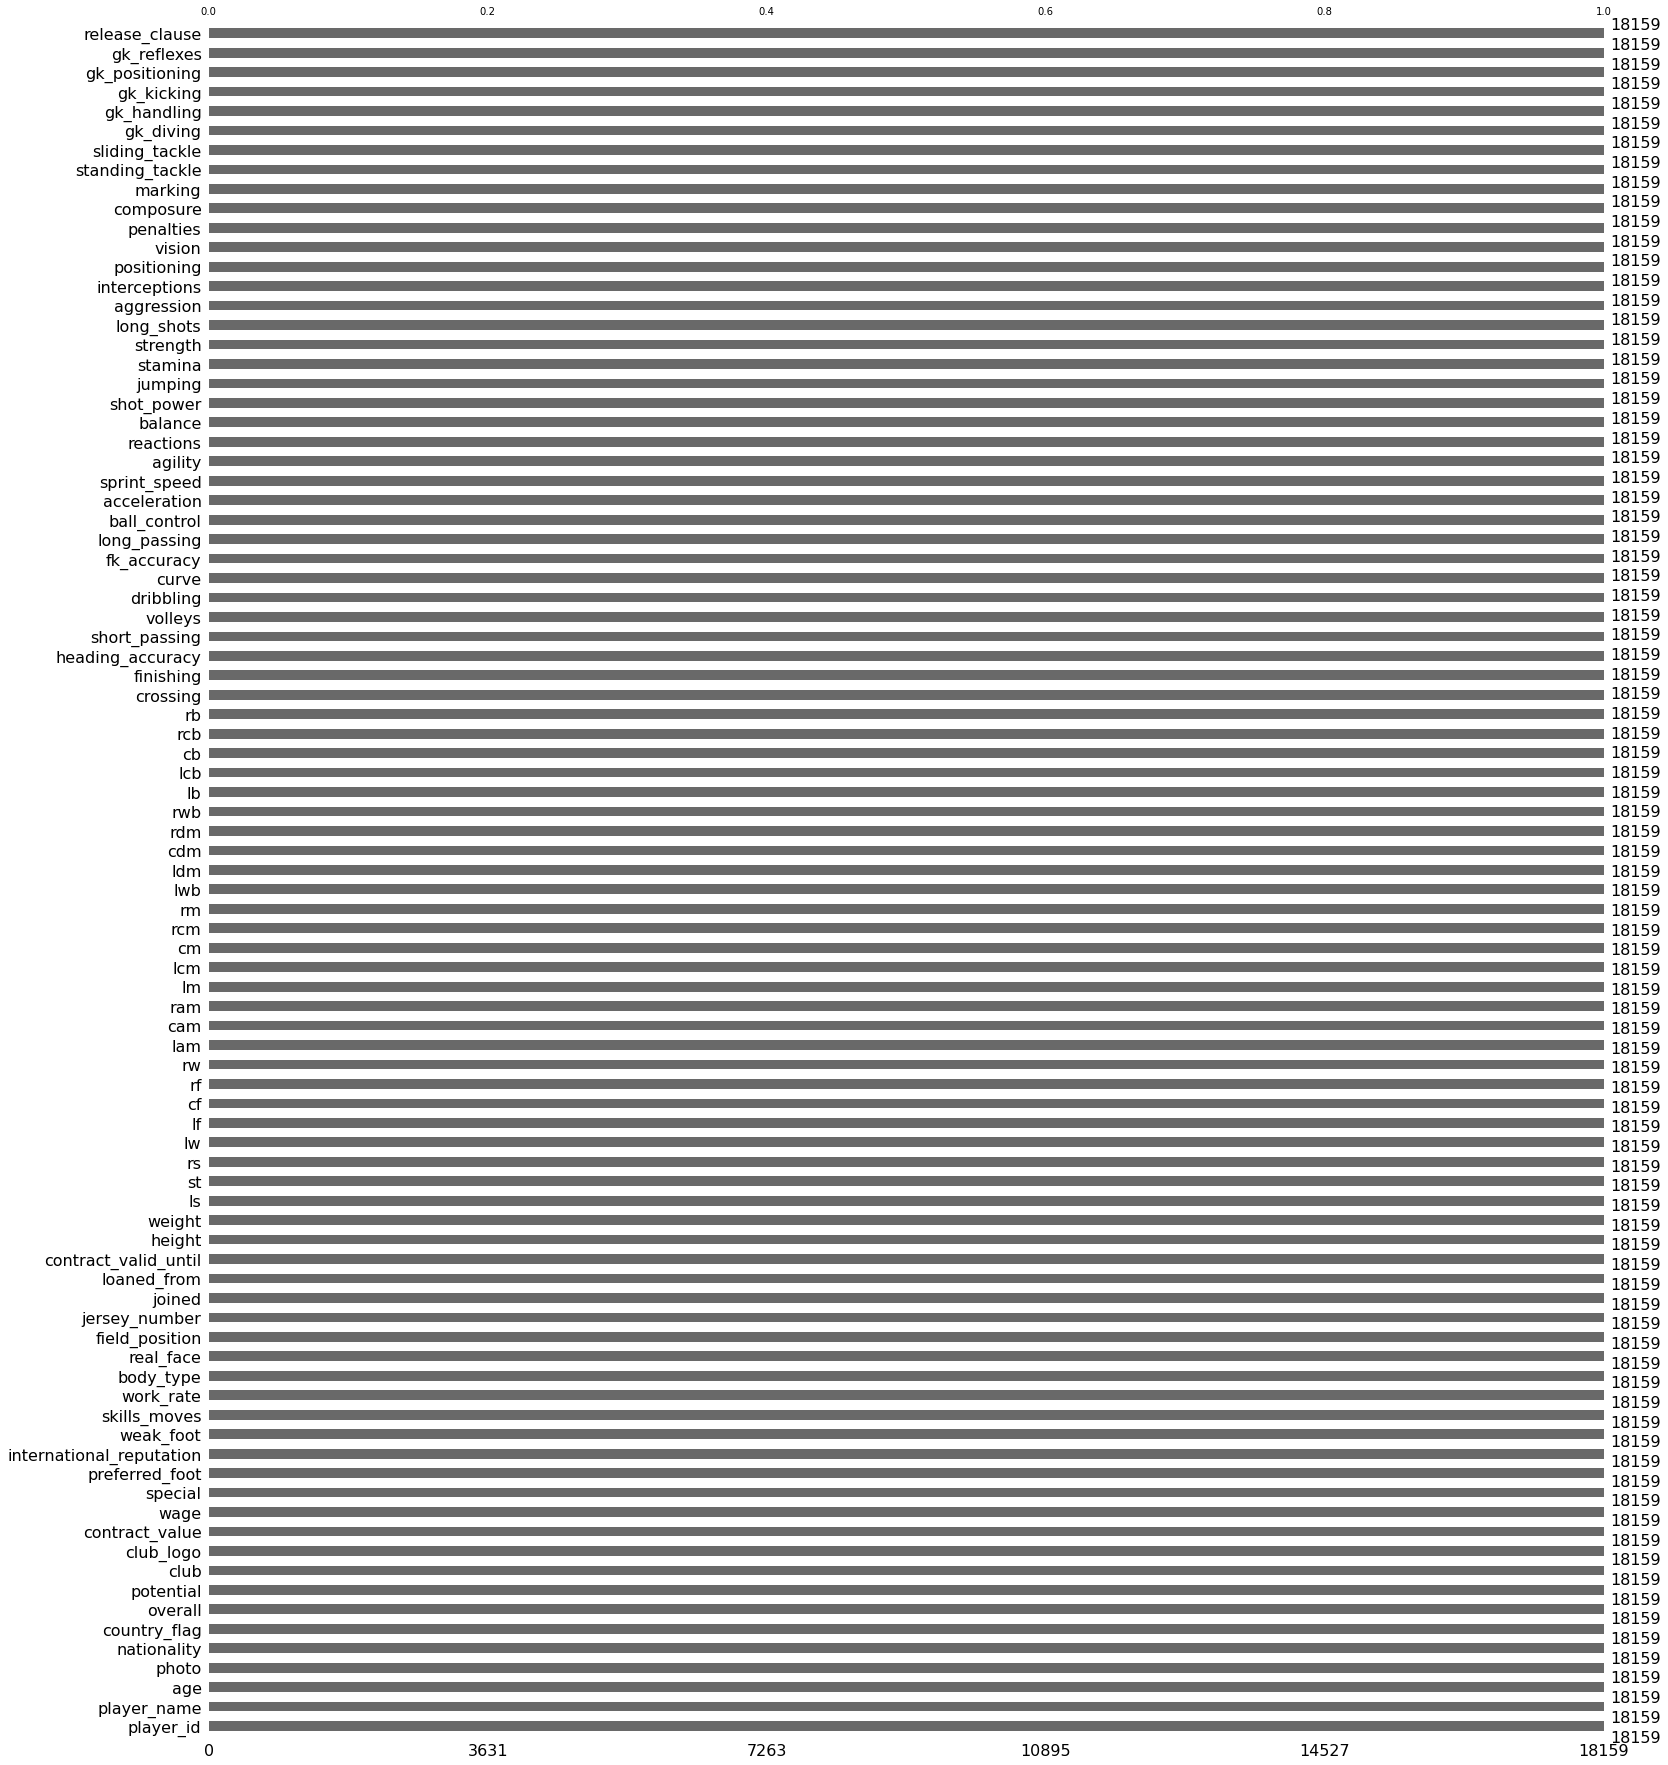

In [6]:
# https://github.com/ResidentMario/missingno
# !pip install missingno

import missingno as msno
plot_count = 1
column_groups = np.array_split(data.columns, plot_count)

for columns in column_groups:
    msno.bar(data[columns])
    plt.show()

In [7]:
print(data.shape)
# display(data.head())
data.info()

(18159, 88)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18159 entries, 0 to 18158
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 18159 non-null  int64  
 1   player_name               18159 non-null  object 
 2   age                       18159 non-null  float64
 3   photo                     18159 non-null  object 
 4   nationality               18159 non-null  object 
 5   country_flag              18159 non-null  object 
 6   overall                   18159 non-null  float64
 7   potential                 18159 non-null  float64
 8   club                      18159 non-null  object 
 9   club_logo                 18159 non-null  object 
 10  contract_value            18159 non-null  object 
 11  wage                      18159 non-null  object 
 12  special                   18159 non-null  object 
 13  preferred_foot            18159 non-null  object 

In [8]:

# df_vals.info()

,player_id,age,overall,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,158023,31.0,94.0,94.0,84,95,70,90,86,97,...,75,96,33,28,26,6,11,15,14,8
1,20801,33.0,94.0,94.0,84,94,89,81,87,88,...,85,95,28,31,23,7,11,15,14,11
2,190871,26.0,92.0,93.0,79,87,62,84,84,96,...,81,94,27,24,33,9,9,15,15,11
3,193080,27.0,91.0,93.0,17,13,21,50,13,18,...,40,68,15,21,13,90,85,87,88,94
4,192985,27.0,91.0,92.0,93,82,55,92,82,86,...,79,88,68,58,51,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18154,238813,19.0,47.0,65.0,34,38,40,49,25,42,...,43,45,40,48,47,10,13,7,8,9
18155,243165,19.0,47.0,63.0,23,52,52,43,36,39,...,43,42,22,15,19,10,9,9,5,12
18156,241638,16.0,47.0,67.0,25,40,46,38,38,45,...,55,41,32,13,11,6,5,10,6,13
18157,246268,17.0,47.0,66.0,44,50,39,42,40,51,...,50,46,20,25,27,14,6,14,8,9


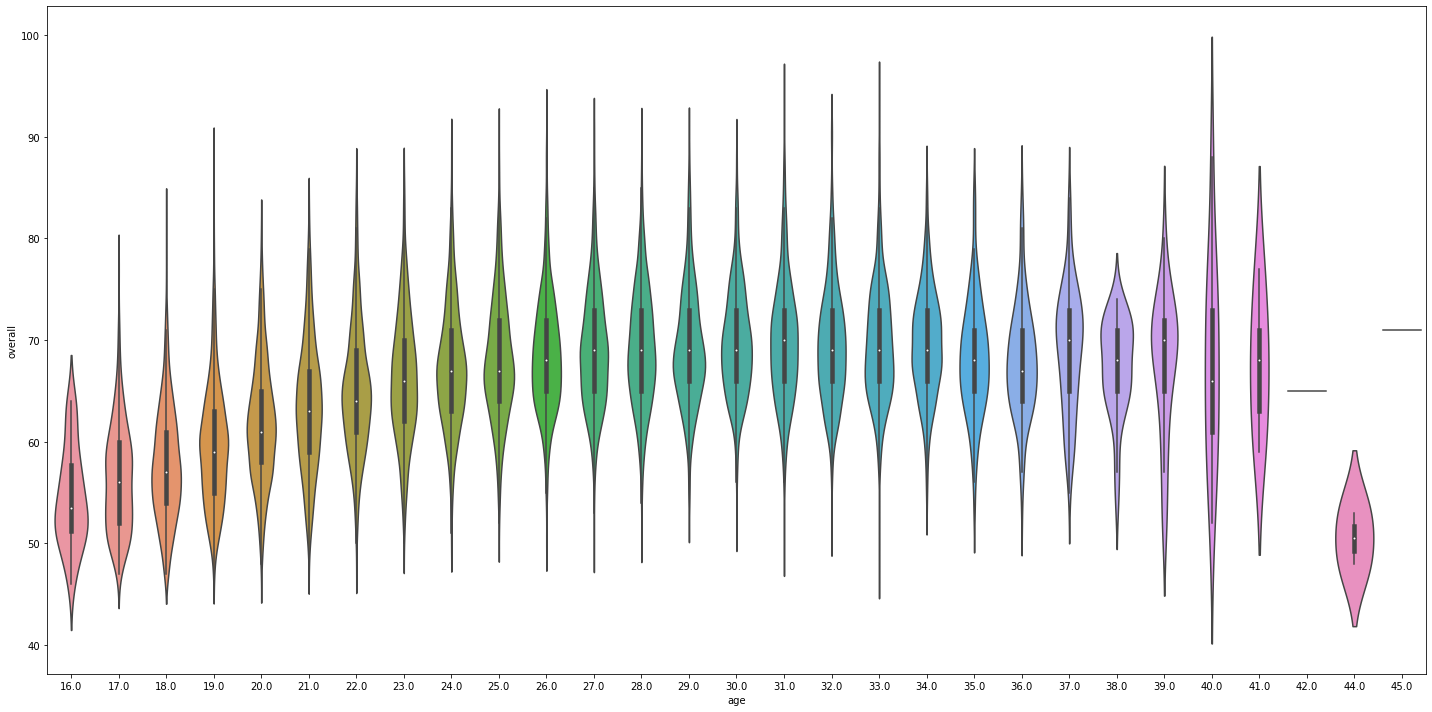

In [286]:
plt.figure(figsize = (20,10))
sns.violinplot(x="age",y = "overall", data = data)
plt.tight_layout()
plt.show()

## Create position class

In [9]:
keepers = []
defenders = []
mid_fielders = []
forwards = []
position_class = data['field_position'].unique()
position_class[-1] = 'unknown'


for label in position_class:
    if(label[-1] == 'K'):
        keepers.append(label)
    if(label[-1] == 'M'):
        mid_fielders.append(label)
    elif(label[-1] =='B'):
        defenders.append(label)
    elif(label[-1] in 'T', 'F', 'S'):
        forwards.append(label)
    else: pass

%store keepers
%store defenders
%store mid_fielders
%store forwards

print(position_class)
print(f"\n{defenders}")
print(f"\n{keepers}")
print(f"\n{mid_fielders}")
print(f"\n{forwards}")

Stored 'keepers' (list)
Stored 'defenders' (list)
Stored 'mid_fielders' (list)
Stored 'forwards' (list)
['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB' 'unknown']

['RCB', 'CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']

['GK']

['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']

['RF', 'ST', 'LW', 'GK', 'LF', 'RS', 'LS', 'RW', 'CF', 'unknown']


## Relevance of Qualitative Features to Rating

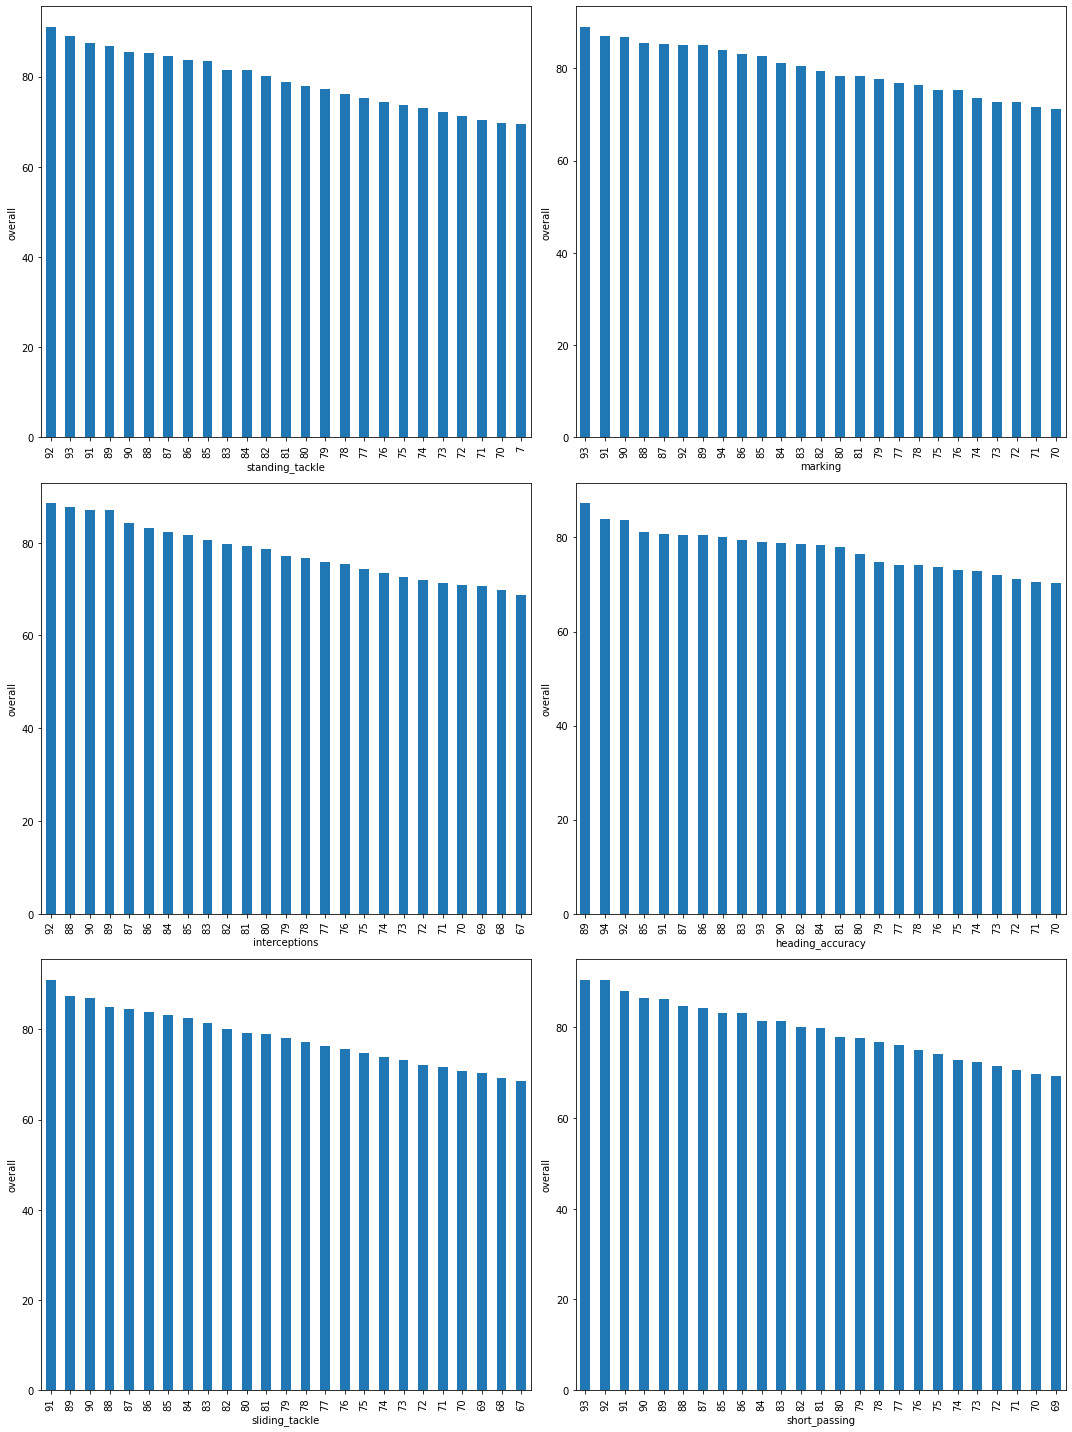

In [10]:
target_vals = ['standing_tackle', 'marking', 'interceptions', 'heading_accuracy', 'sliding_tackle', 'short_passing']
# print(target_vals)
fig = plt.figure(figsize = (15,20))

for i, feature in enumerate(target_vals):
    # print(feature)
    # print(data.groupby([feature]).mean()["overall"])
    ax = fig.add_subplot(3,2,i+1)
    data.groupby([feature]).mean()["overall"].sort_values(ascending=False)[0:25].plot(kind="bar")
    ax.set_ylabel("overall")
    
plt.tight_layout()
plt.show()

## Quant Features against Rating

In [13]:
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso, LinearRegression

X = df_vals.values
X = scale(X)
y = rating.values.ravel()

In [11]:
fig = plt.figure(figsize = (15,60))
for idx in range(37):
    feature = df_vals.columns[idx]
    ax = fig.add_subplot(13,3,idx+1)
    Xtmp = df_vals[feature]
    ax.scatter(Xtmp, y)
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

NameError: name 'y' is not defined

## Prediction of a Player’s Rating

## Feature selection

In [10]:
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)
rfe_fit = rfe.fit(X, y)

for feat in df_vals.columns[rfe_fit.support_]:
    print(feat)

player_id
age
potential
heading_accuracy
short_passing
ball_control
sprint_speed
reactions
stamina
strength
composure
gk_diving
gk_handling
gk_positioning
gk_reflexes


In [297]:
sns.pairplot(data.loc[:,df_vals.columns[rfe_fit.support_].values], diag_kind = "kde")
plt.show()

NameError: name 'df' is not defined

In [1]:
# Import classifiers
# from sklearn.neural_network import MLPRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Ridge, LinearRegression, Lasso, LogisticRegression
# from xgboost import XGBRegressor

#Import helper functions
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import r2_score

import time

# Function to help with repeated plotting of predictions
def pred_plotter(X_test, y_test, model, model_name = ""):
    preds = model.predict(X_test)
    plt.scatter(y_test, preds)
    plt.xlabel("Predicted Ratings")
    plt.ylabel("Actual Ratings")
    plt.title(model_name)

# Names of classifiers we want to use
clf_names = [
            # "KNN", "Linear SVM",
            #  "RBF SVM",
            #  "Bagging Classifier",
             "Decision Tree", 
             "Random Forest", 
            #  "Neural Net", 
            #  "AdaBoost",
            #  "Naive Bayes", 
             "GradientBooster", 
            #  "LDA",
            #  "XGBoost", 
            #  "Linear Regression",
             "Logistic Regression",
            #  "Ridge", 
            #  "Lasso"
             ]

# Implementation of each classifier we want to use, large scope in here for parameter tuning etc.
clfs = [
        # KNeighborsRegressor(3),
        # SVC(kernel="linear", C=0.025),
        # SVC(gamma=2, C=1),
        # BaggingRegressor(KNeighborsRegressor(), max_samples=0.5, max_features=0.5),
        DecisionTreeRegressor(max_depth=5),
        RandomForestRegressor(max_depth=5, n_estimators=250, max_features=4),
        # MLPRegressor(alpha=1),
        # AdaBoostRegressor(),
        # GaussianNB(),
        GradientBoostingRegressor(n_estimators = 20),
        # LinearDiscriminantAnalysis(),
        # XGBRegressor(),
        # LinearRegression(),
        LogisticRegression(), 
        # Ridge(alpha = 1.0,fit_intercept=True),
        # Lasso(alpha = 1.0, fit_intercept=True)
       ]

# Create test/train splits, and initialise plotting requirements
#  We won't apply on feature reduction here, but it can be explored. 
X = df_vals.values 
X = scale(X)
y = rating.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
regressor_data = pd.DataFrame(columns = ["Name", "Score", "Training_Time"])
fig = plt.figure(figsize = (15,60))
i = 0
print('here!')
# Iterate over each regressor (no cross validation/KFolds yet)
for name, clf in zip(clf_names, clfs):
    print("#" * 80)
    print("Fitting '%s' regressor." % name)
    
    # Time required to fit the regressor
    t0 = time.time()
    clf.fit(X_train, y_train)
    t1 = time.time()
    preds = clf.predict(X_test)
    score = r2_score(y_test, preds)
    print("Name: %s Score: %.2f Time %.4f secs" % (name, score, t1-t0))
    
    # Create a plot showing predictions against actual
    ax = fig.add_subplot(6,3,i+1)
    pred_plotter(X_test, y_test, clf, name)
    
    # Store results  
    regressor_data.loc[i] = [name, score, t1-t0]
    i += 1
plt.show()

NameError: name 'df_vals' is not defined

In [ ]:
regressor_data.sort_values(by="Score", ascending = False)

## Improving results

In [35]:
from sklearn.ensemble import BaggingRegressor

eclf1= BaggingRegressor(RandomForestRegressor(),n_estimators = 200)

eclf1.fit(X_train, y_train)
score = r2_score(y_test, eclf1.predict(X_test))
print("Bagging RF Score: ", score)
pred_plotter(X_test, y_test, eclf1, "Bagging Regressor")
plt.show()

## Plot raw data for missing values

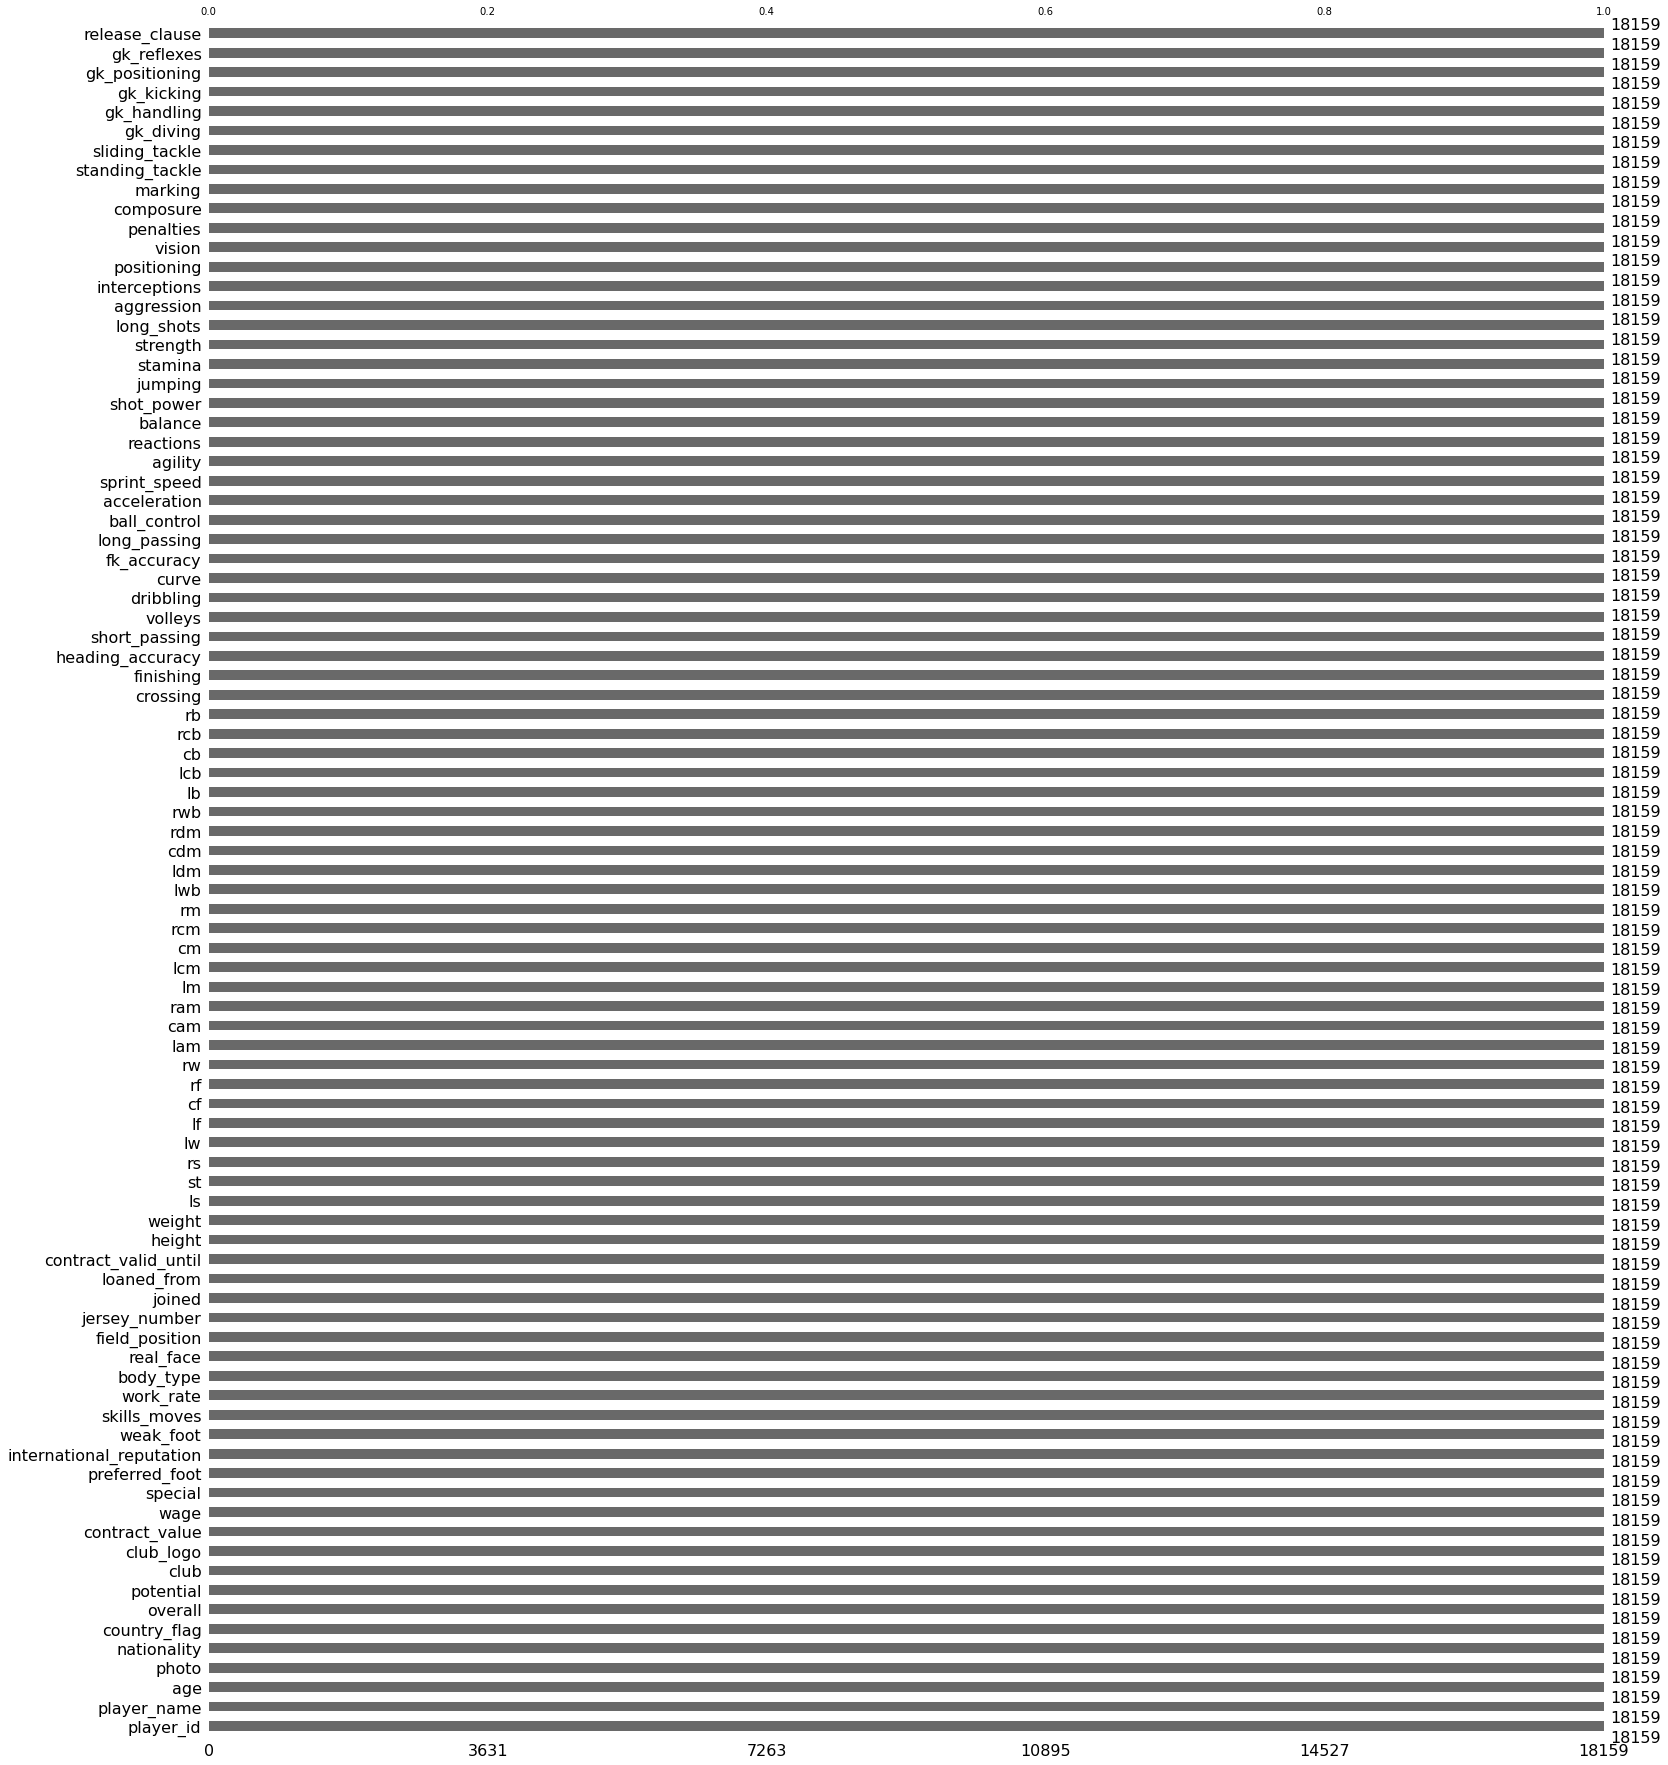

In [17]:
# https://github.com/ResidentMario/missingno
# !pip install missingno

import missingno as msno
plot_count = 1
column_groups = np.array_split(data.columns, plot_count)

for columns in column_groups:
    msno.bar(data[columns])
    plt.show()

## Categorical and numeric attributes in raw data

In [197]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

print("Number of numeric attributes - " + str(len(data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)))
print("Number of categorical attributes - " + str(len(data.select_dtypes(include=['object']).columns)))

Number of numeric attributes - 2
Number of categorical attributes - 86


## Correlation matrix between categorical and numeric attributes

In [199]:
for position in forwards_df['field_position'].unique(): 
    
    try:
    
        # Subset by position
        temp_df = forwards_df[forwards_df['field_position'] == position]

        # Find correlations
        temp_corr = forwards_df[forwards_df['field_position'] == position].corr()['rating'].to_frame()
        temp_corr = temp_corr[temp_corr['rating'] > 0.5]


        # Keep only columns with correltion above 0.5
        temp_features = list(temp_corr.T)
        temp_model_df = temp_df[temp_features]

        #print(temp_features)
        # Split data into train and test, isolate y (target/dependent variable)
        train_set, test_set = train_test_split(temp_model_df, test_size=0.2, random_state=42)
        target_train = train_set['rating']
        train_set = train_set.drop(['rating'], axis = 1) #, 'potential', 'overall'], axis = 1)
        

        # Fit model
        train_set = sm.add_constant(train_set, prepend=False)

        # Fit and summarize OLS model
        mod = sm.OLS(target_train, train_set)

        res = mod.fit()
        
        features = pd.DataFrame([res.pvalues, res.params]).T
        features.columns = ['P-value', 'Coefficient']
        features = features[features['P-value']<0.05]
        features = features.sort_values(by = 'Coefficient', ascending = False)
    

        print(f' ********* Current Position: {position}: \n ')
        print(f' ********* Significant features in order of impact: {features.index}: \n ')
        print(res.summary())
        print('\n')
        
    except BaseException as e: 
        print(f'WARNING: SKIPPING {position} due to {e}')

NameError: name 'forwards_df' is not defined

In [200]:
features_correlation_to_ranking(data, defenders,'overall')

In [201]:
len(['LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',])

26

In [8]:
print(f'in the dataset there are {len(data.columns)} columns and {len(data)} rows')

in the dataset there are 88 columns and 18207 rows


In [202]:

# https://github.com/ResidentMario/missingno
!pip install missingno

import missingno as msno

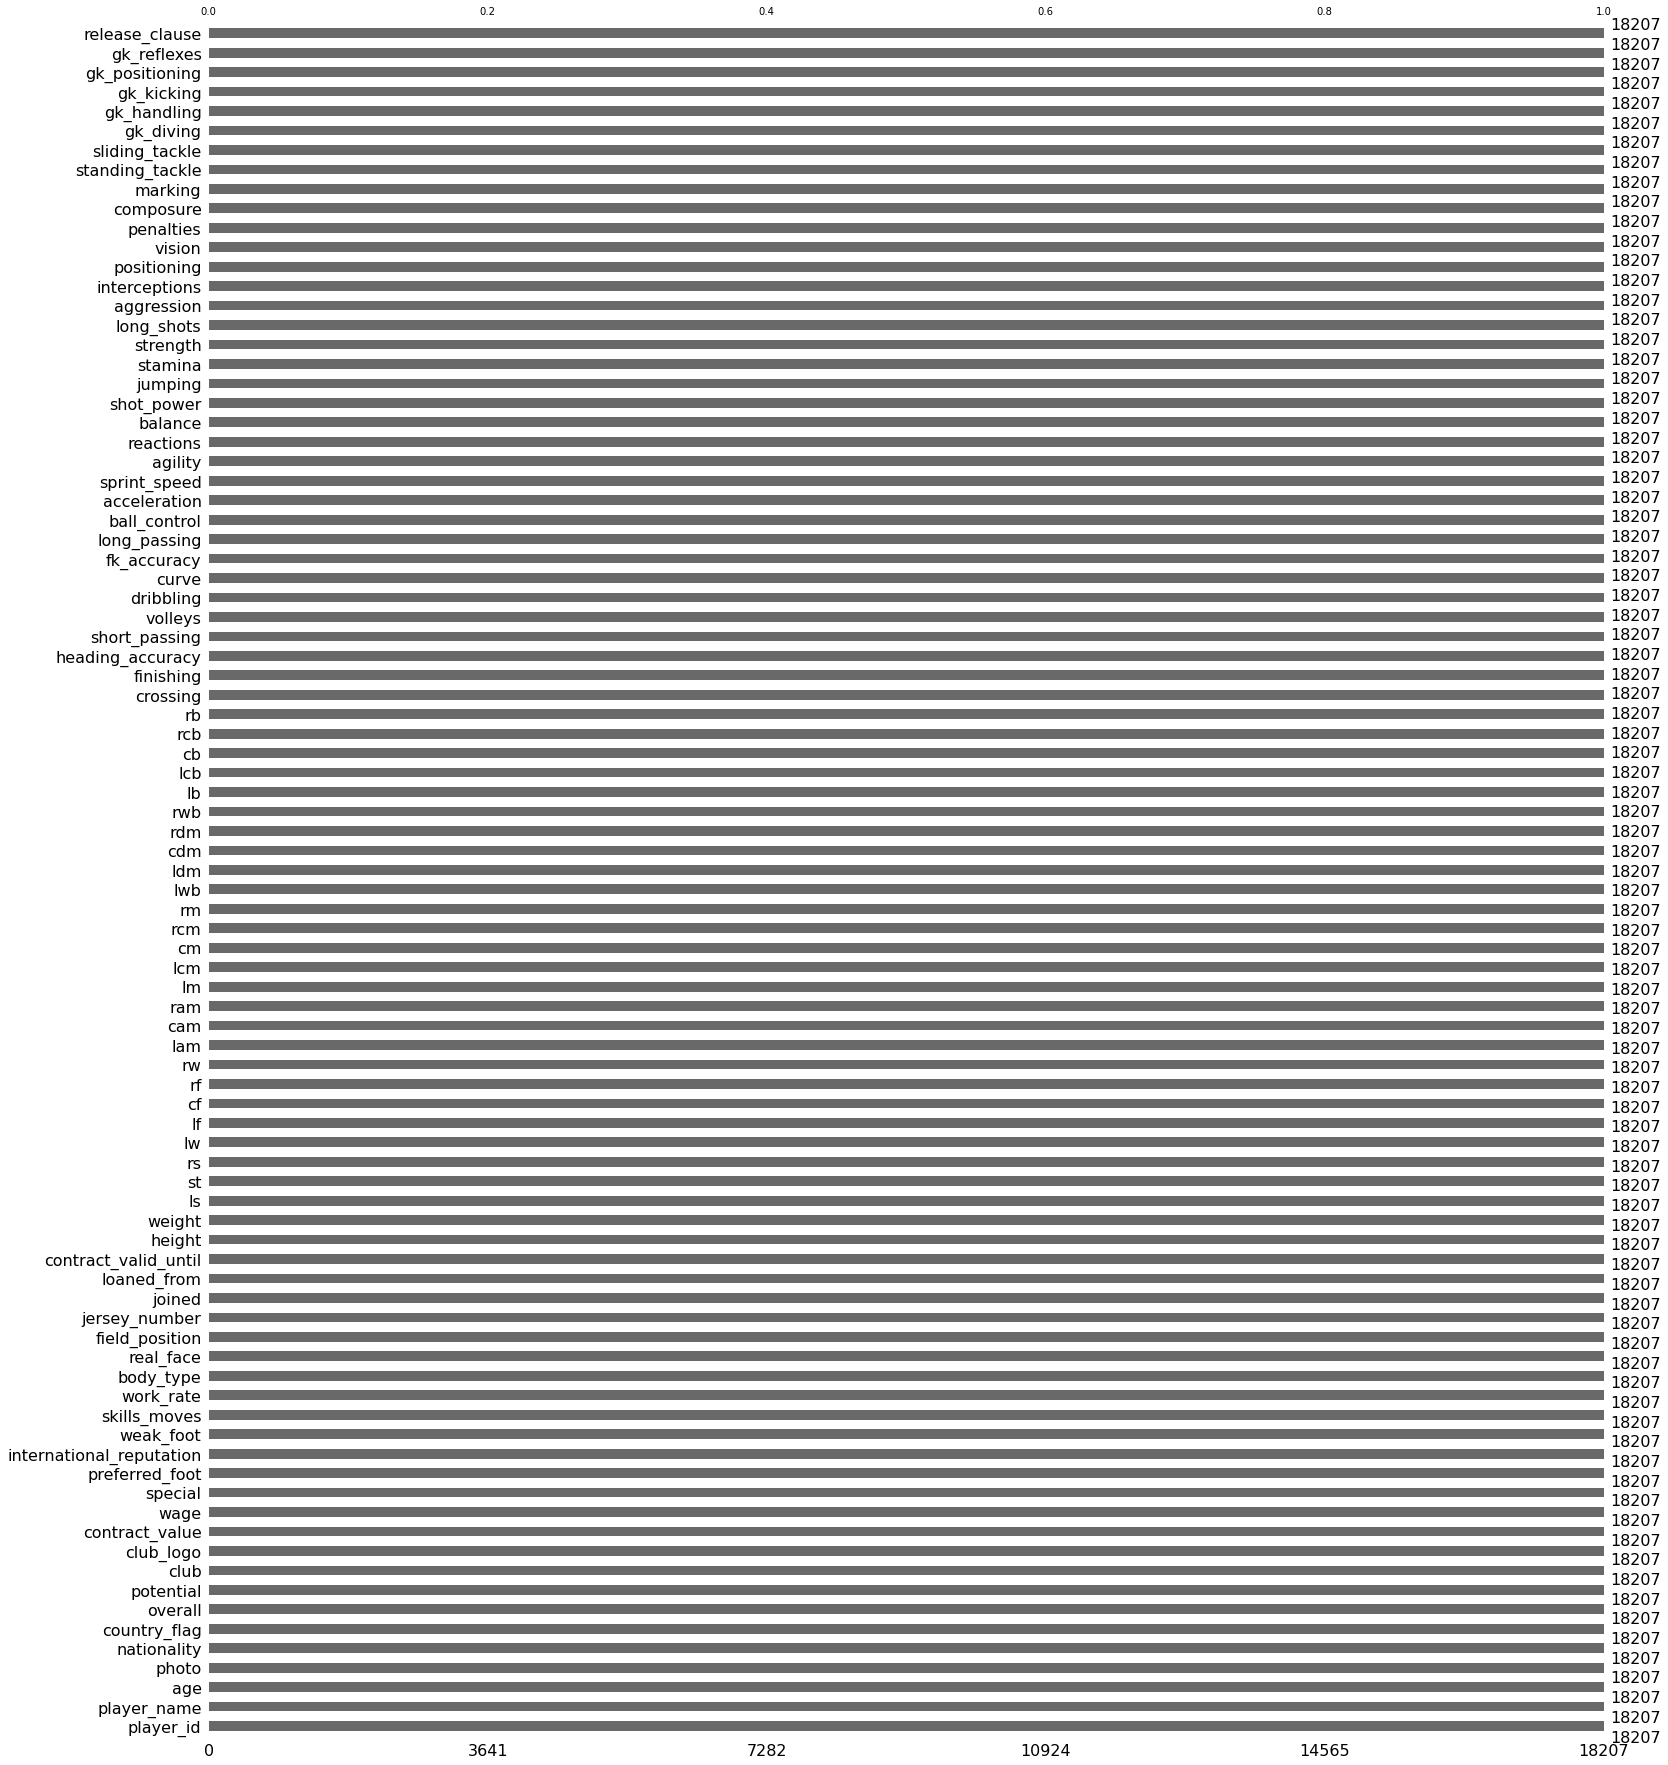

In [203]:
plot_count = 1
column_groups = np.array_split(data.columns, plot_count)

for columns in column_groups:
    msno.bar(data[columns])
    plt.show()

In [204]:
specific_positions = ('LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RW', 'LAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'RDM', 'LB', 'LCB', 'RCB', 'RB', 'RF','CAM','CDM','CB')

In [205]:
data_with_empty_positions = data[data[specific_positions].isnull().any(axis=1)]
len(data_with_empty_positions)

KeyError: ('LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RW', 'LAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'RDM', 'LB', 'LCB', 'RCB', 'RB', 'RF', 'CAM', 'CDM', 'CB')

In [206]:
# player_features = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
#                    'LongPassing','BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
#                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
#                    'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking',
#                    'GKPositioning', 'GKReflexes']
player_features = ['overall', 'field_position', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping',
    'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking']
df_postion  = pd.DataFrame()
for position_name, features in data.groupby(data['field_position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    df_postion[position_name] = tuple(top_features)
df_postion.head()

DataError: No numeric types to aggregate